In [6]:
from pybrain.supervised.trainers.backprop import BackpropTrainer
from pybrain.structure import RecurrentNetwork, LinearLayer, SigmoidLayer ,TanhLayer, BiasUnit, FullConnection
from pybrain.datasets import SupervisedDataSet 
import matplotlib.pyplot as plt
import numpy as np 
from random import random as rnd

net = RecurrentNetwork()
net.addInputModule(LinearLayer(2,name='input'))
net.addModule(SigmoidLayer (2,name='hidden'))
net.addModule(BiasUnit('bias'))
net.addOutputModule(SigmoidLayer (2,name='output'))
net.addModule(LinearLayer(2,name='context'))
net.addConnection(FullConnection(net['input'], net['hidden']))
net.addConnection(FullConnection(net['context'], net['hidden']))
net.addConnection(FullConnection(net['bias'], net['hidden']))
net.addConnection(FullConnection(net['bias'], net['output']))
net.addConnection(FullConnection(net['hidden'], net['output']))
net.addRecurrentConnection(FullConnection(net['hidden'], net['context']))
net.sortModules()
net.randomize()
net.reset()

inputs = []
ix = 0
for i in range(100):
    ln = int(rnd()*6)+3
    for j in range(ln):
        inputs.append([1,0])
    for j in range(ln):
        inputs.append([0,1])
outputs = inputs[1:]
inputs = inputs[:-1]
ds = SupervisedDataSet(2, 2) 
for i in range(len(inputs)):
    ds.addSample(inputs[i],outputs[i])
    

In [2]:
bp = BackpropTrainer(net,ds,verbose=False,learningrate=0.25)
bp.trainEpochs(1)
print('Done training')

Done training


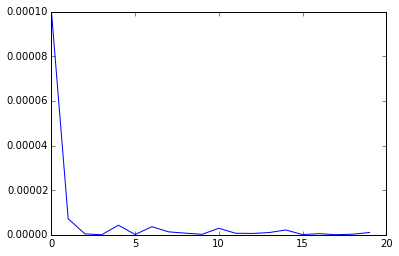

In [7]:
net.randomize()
bp = BackpropTrainer(net,ds,verbose=False,learningrate=0.25)
errs = []
for i in range(20):
    bp.trainEpochs(1)
    err = 0
    for seq in ds:
        net.reset()
        res = net.activate(seq[0])
        err += sum(res-seq[1])**2
    errs.append(err/len(ds['input']))
%matplotlib inline
plt.plot(errs)
    

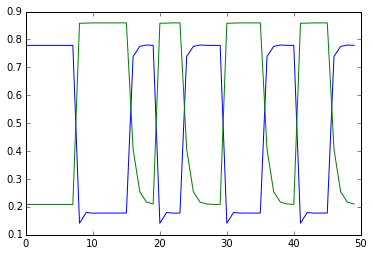

In [9]:
outs = []
for i in range(50):
    outs.append(net.activate(ds['input'][i]))
%matplotlib inline
plt.plot(np.array(outs))


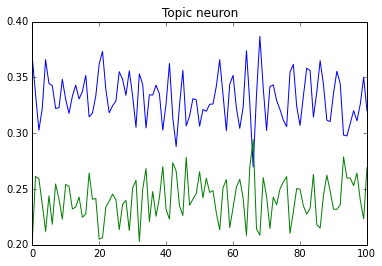

In [118]:
topicState = net.activate([0,1])
states = [topicState]
for i in range(100):
    pulse = [(rnd()-.5)/1,(rnd()-.5)/1]
    topicState = net.activate(topicState+pulse)
    states.append(topicState)
%matplotlib inline
plt.plot(np.array(states))
plt.title('Topic neuron');

In [123]:
ds

In [70]:
net['hidden'].inputbuffer


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-5.08134204,  1.96815113, -7.16154356, ..., -1.29673407,
         8.12389609, -3.38292749],
       [-4.69987346,  1.83651482, -2.70102456, ..., -4.75576384,
         7.18705946, -6.16355366],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [71]:
net['context'].inputbuffer

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-5.08134204,  1.96815113, -7.16154356, ..., -1.29673407,
         8.12389609, -3.38292749],
       [-4.69987346,  1.83651482, -2.70102456, ..., -4.75576384,
         7.18705946, -6.16355366],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [130]:
errs

[1.984635307360892]

In [131]:
seq

[array([ 0.,  1.]), array([ 0.,  1.])]

In [140]:
ds[1]

KeyError: 1